In [1]:
import pandas as pd
df = pd.read_csv('.\\enron_spam_data.csv')
print(df.head())

   Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  


In [2]:
print(df.describe())

         Message ID
count  33716.000000
mean   16857.500000
std     9733.115174
min        0.000000
25%     8428.750000
50%    16857.500000
75%    25286.250000
max    33715.000000


In [3]:
# Count the frequency of each value in the "Spam/Ham" column
type_counts = df['Spam/Ham'].value_counts()
print(type_counts)

Spam/Ham
spam    17171
ham     16545
Name: count, dtype: int64


In [4]:
# prompt: change the value ham and spam in Spam/Ham column to 0 and 1
df['Spam/Ham'] = df['Spam/Ham'].replace(['ham', 'spam'], [0, 1])
# prompt: remove the column ID and Date and show the dataset as a table
df = df.drop(['Message ID', 'Date'], axis=1)
print(df)


                                                 Subject  \
0                           christmas tree farm pictures   
1                               vastar resources , inc .   
2                           calpine daily gas nomination   
3                                             re : issue   
4                              meter 7268 nov allocation   
...                                                  ...   
33711  = ? iso - 8859 - 1 ? q ? good _ news _ c = eda...   
33712  all prescript medicines are on special . to be...   
33713              the next generation online pharmacy .   
33714                     bloow in 5 - 10 times the time   
33715                   dear sir , i am interested in it   

                                                 Message  Spam/Ham  
0                                                    NaN         0  
1      gary , production from the high island larger ...         0  
2                 - calpine daily gas nomination 1 . doc         0  
3  

In [5]:
# Extract the 'Message' column
massage_texts = df['Message'].tolist()

# Print the first 10 message texts
print(massage_texts[:10])

[nan, 'gary , production from the high island larger block a - 1 # 2 commenced on\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\ndaren j farmer\n12 / 10 / 99 10 : 38 am\nto : carlos j rodriguez / hou / ect @ ect\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ncarlos ,\nplease call linda and get everything set up .\ni \' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\nfollowing day based on my conversations with bill fischer at bmar .\nd .\n- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34\nam - - - - - - - - - - - - - - - - - - - - - - - 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the DataFrame into X (features) and y (target)
X = df['Message']  # Features
y = df['Spam/Ham']  # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (26972,)
X_test shape: (6744,)
y_train shape: (26972,)
y_test shape: (6744,)


In [7]:
def remove_null(datas,labels):
    not_null_idx = [i for i,o in enumerate(datas) if o is not None]
    return np.array(datas)[not_null_idx],np.array(labels)[not_null_idx]

In [8]:
import numpy as np
x_train,y_train = remove_null(x_train,y_train)
x_test,y_test = remove_null(x_test,y_test)

# Preprocessing

## Process sentence

In [9]:
import re
import string
from nltk.tokenize import word_tokenize

In [10]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

In [11]:
def to_lower(word):
    result = word.lower()
    return result

In [12]:
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

In [13]:
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

In [14]:
def remove_whitespace(word):
    result = word.strip()
    return result

In [15]:
def replace_newline(word):
    return word.replace('\n','')

In [16]:
def clean_up_pipeline(sentence):
    if not isinstance(sentence, str):
        return sentence  # Return the sentence unchanged if it is not a string
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [17]:
x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

## Process word by word

In [18]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [19]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [20]:
from nltk.tokenize import word_tokenize as nltk_word_tokenize

def word_tokenize(sentence):
    if not isinstance(sentence, str):
        return []  # Return an empty list if the input is not a string
    return nltk_word_tokenize(sentence)

x_train = [word_tokenize(o) for o in x_train]
x_test = [word_tokenize(o) for o in x_test]


In [21]:
def remove_stop_words(words):
    result = [i for i in words if i not in sklearn_stop_words]
    return result

In [22]:
def word_stemmer(words):
    return [stemmer.stem(o) for o in words]

In [23]:
def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]

In [24]:
def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_stemmer,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

In [25]:
x_train = [clean_token_pipeline(o) for o in x_train]
x_test = [clean_token_pipeline(o) for o in x_test]

In [26]:
x_train = [" ".join(o) for o in x_train]
x_test = [" ".join(o) for o in x_test]

# Visualization

This section of visualization code is referred from: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc

## Wordcloud

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [35]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [36]:
spam_train_index = [i for i,o in enumerate(y_train) if o == 1]
non_spam_train_index = [i for i,o in enumerate(y_train) if o == 0]

In [37]:
spam_email = np.array(x_train)[spam_train_index]
non_spam_email = np.array(x_train)[non_spam_train_index]

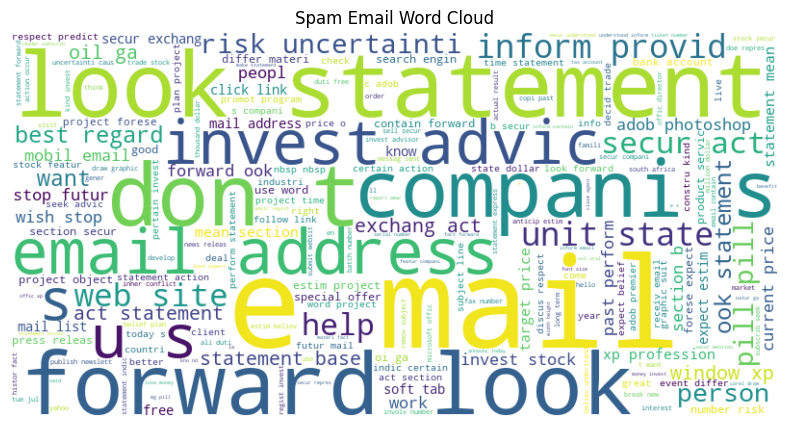

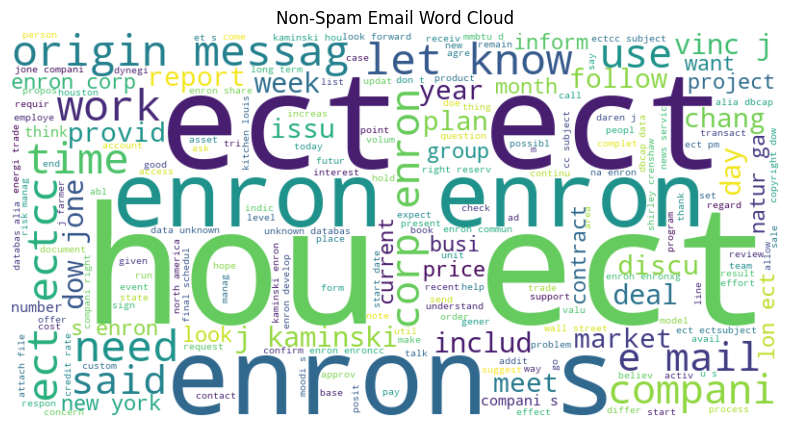

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def plot_wordcloud(emails, title='Word Cloud'):
    # Combine emails into a single text
    text = ' '.join(emails)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for spam and non-spam emails
plot_wordcloud(spam_email, title='Spam Email Word Cloud')
plot_wordcloud(non_spam_email, title='Non-Spam Email Word Cloud')


## TreeMap

In [39]:
!! pip install squarify


['Requirement already satisfied: squarify in c:\\users\\user\\appdata\\local\\programs\\python\\python311\\lib\\site-packages (0.4.4)',
 '',
 '[notice] A new release of pip is available: 24.1.2 -> 24.2',
 '[notice] To update, run: python.exe -m pip install --upgrade pip']

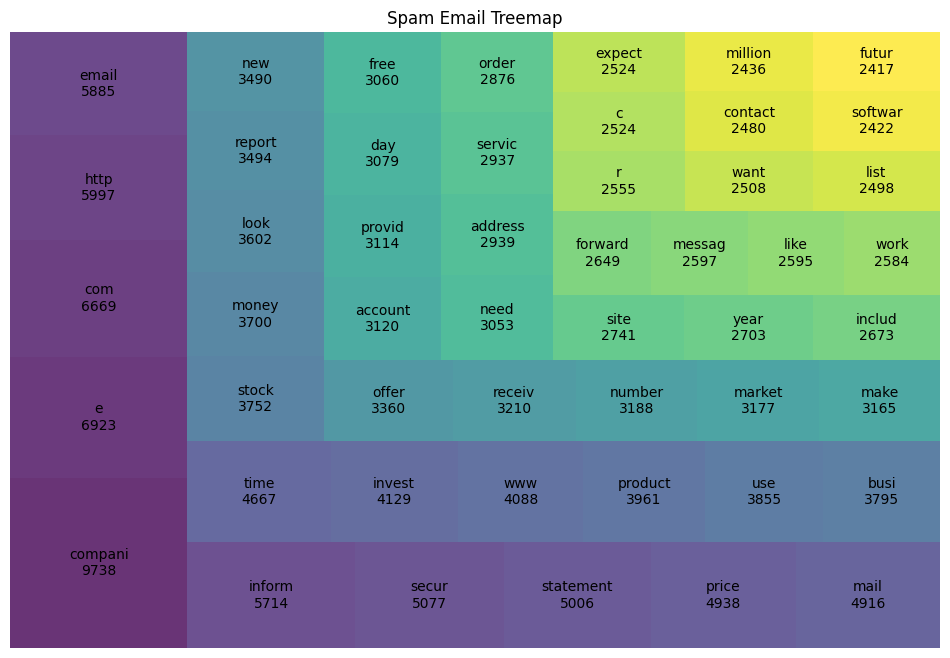

In [40]:
import matplotlib.pyplot as plt
import squarify
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

# Function to create a treemap
def plot_treemap(emails, title='Treemap'):
    # Tokenize and clean words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(' '.join(emails))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    # Count word frequencies
    word_freq = Counter(words)
    top_words = word_freq.most_common(50)  # Get the top 50 words

    # Prepare data for treemap
    labels = [f'{word}\n{freq}' for word, freq in top_words]
    sizes = [freq for word, freq in top_words]

    # Plotting the treemap
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.viridis(np.linspace(0, 1, len(labels))))
    plt.axis('off')
    plt.title(title)
    plt.show()

# Call the treemap function with spam emails
plot_treemap(spam_email, title='Spam Email Treemap')


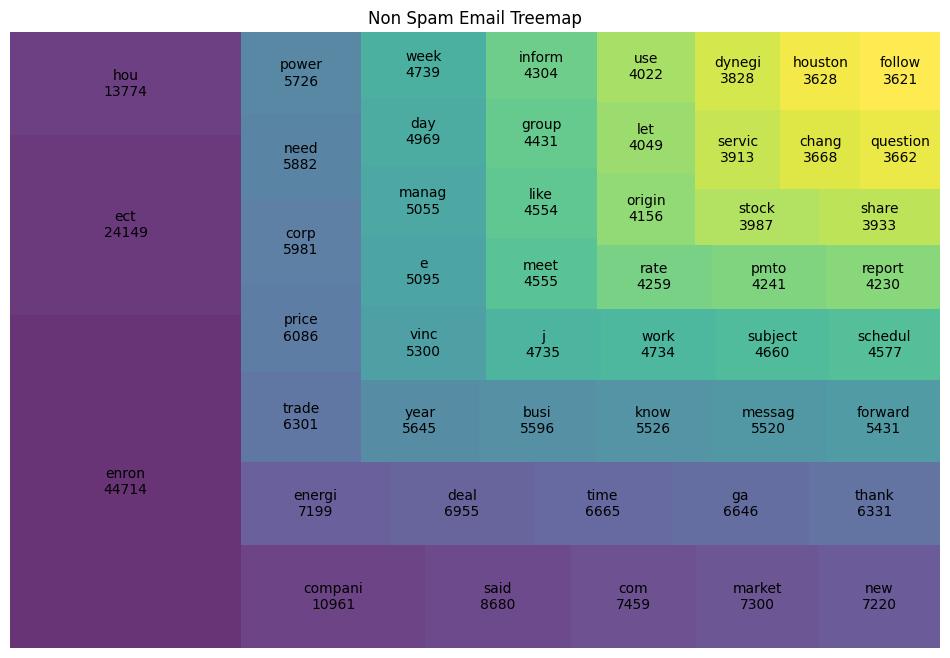

In [41]:
import matplotlib.pyplot as plt
import squarify
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

# Function to create a treemap for non-spam emails
def plot_treemap_non_spam(emails, title='Treemap'):
    # Tokenize and clean words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(' '.join(emails))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    # Count word frequencies
    word_freq = Counter(words)
    top_words = word_freq.most_common(50)  # Get the top 50 words

    # Prepare data for treemap
    labels = [f'{word}\n{freq}' for word, freq in top_words]
    sizes = [freq for word, freq in top_words]

    # Plotting the treemap
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.viridis(np.linspace(0, 1, len(labels))))
    plt.axis('off')
    plt.title(title)
    plt.show()

# Call the treemap function with non-spam emails
plot_treemap_non_spam(non_spam_email, title='Non Spam Email Treemap')


# Visualizing using bar chart

In [42]:
# This function is needed to include in the cell to show the plotly graph 
# in colab

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [43]:
from collections import defaultdict
import pandas as pd
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [45]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


In [46]:
def visualize_in_bar_chart(word_count=1):
    ## Get the bar chart from sincere questions ##
    freq_dict = defaultdict(int)
    for sent in non_spam_email:
        for word in generate_ngrams(sent,word_count):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace0 = horizontal_bar_chart(fd_sorted.head(20), 'orange')

    ## Get the bar chart from insincere questions ##
    freq_dict = defaultdict(int)
    for sent in spam_email:
        for word in generate_ngrams(sent,word_count):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace1 = horizontal_bar_chart(fd_sorted.head(20), 'orange')

    # Creating two subplots
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of non spam email", 
                                              "Frequent words of spam email"])
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 1, 2)
    fig['layout'].update(height=600, width=800, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')

In [48]:
configure_plotly_browser_state()
visualize_in_bar_chart(2)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Target Distribution

In [94]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [95]:
spam_train_index = [i for i,o in enumerate(y_train) if o == 1]
non_spam_train_index = [i for i,o in enumerate(y_train) if o == 0]

In [96]:
configure_plotly_browser_state()

spam_size = len(spam_train_index)
non_spam_size = len(non_spam_train_index)
total_train_size = spam_size + non_spam_size

trace = go.Bar(
    x=["Spam","Non Spam"],
    y=[spam_size, non_spam_size],
    marker=dict(
        color=[spam_size, non_spam_size],
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count for Train Data',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(["Spam", "Non Spam"]))
sizes = (np.array(([spam_size,non_spam_size]))/total_train_size*100)

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Train Data distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

In [97]:
configure_plotly_browser_state()

spam_test_index = [i for i,o in enumerate(y_test) if o == 1]
non_spam_test_index = [i for i,o in enumerate(y_test) if o == 0]

spam_size = len(spam_test_index)
non_spam_size = len(non_spam_test_index)
total_test_size = spam_size + non_spam_size

trace = go.Bar(
    x=["Spam","Non Spam"],
    y=[spam_size, non_spam_size],
    marker=dict(
        color=[spam_size, non_spam_size],
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count for Test Data',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(["Spam", "Non Spam"]))
sizes = (np.array(([spam_size,non_spam_size]))/total_train_size*100)

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Test Data Distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

# Feature Extraction

Choose either TfidVectorizer of CountVectorizer

## TF-IDF Vectorizer

In [98]:
x_train = [o.split(" ") for o in x_train]
x_test = [o.split(" ") for o in x_test]

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
vectorizer = TfidfVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

TfidfVectorizer()

In [101]:
def convert_to_feature(raw_tokenize_data):
    raw_sentences = [' '.join(o) for o in raw_tokenize_data]
    return vectorizer.transform(raw_sentences)

In [102]:
x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)

## Count Vectorizer

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
vectorizer = CountVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

CountVectorizer()

In [105]:
x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)

## Training classifier

## Multinomial NB

In [110]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

clf = MultinomialNB()
lgstR = LogisticRegression()

# Fit the models using the sparse matrix directly
clf.fit(x_train_features, y_train)
lgstR.fit(x_train_features, y_train)


LogisticRegression()

## Error Analysis

## Multinomial NB

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [113]:
# Predict directly using the sparse matrix without converting to a dense array
y_predict = clf.predict(x_test_features)


In [114]:
confusion_matrix(y_test,y_predict)

array([[3209,   67],
       [  58, 3410]], dtype=int64)

In [115]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()

In [116]:
# Calculate performance metrics
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

# Print performance metrics
print("Precision: {:.2f}%".format(100 * precision))
print("Recall: {:.2f}%".format(100 * recall))
print("F1 Score: {:.2f}%".format(100 * f1))
print("Accuracy: {:.2f}%".format(100 * accuracy))

Precision: 98.07%
Recall: 98.33%
F1 Score: 98.20%
Accuracy: 98.15%


### Plot confusion matrix

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [118]:
cnf_matrix = confusion_matrix(y_test,y_predict)

In [119]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[3209   67]
 [  58 3410]]


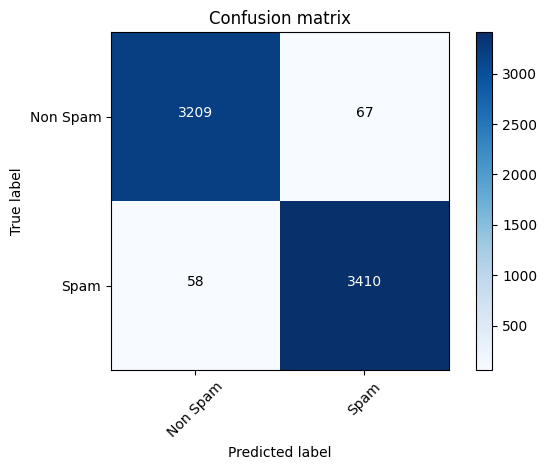

In [120]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')

# **Logistic Regression**

In [122]:
y_predict = lgstR.predict(x_test_features)

In [123]:
confusion_matrix(y_test,y_predict)

array([[3179,   97],
       [  36, 3432]], dtype=int64)

In [124]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()

In [125]:
# Calculate performance metrics
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

# Print performance metrics
print("Precision: {:.2f}%".format(100 * precision))
print("Recall: {:.2f}%".format(100 * recall))
print("F1 Score: {:.2f}%".format(100 * f1))
print("Accuracy: {:.2f}%".format(100 * accuracy))

Precision: 97.25%
Recall: 98.96%
F1 Score: 98.10%
Accuracy: 98.03%


### Plot confusion matrix

In [126]:
cnf_matrix = confusion_matrix(y_test,y_predict)

Confusion matrix, without normalization
[[3179   97]
 [  36 3432]]


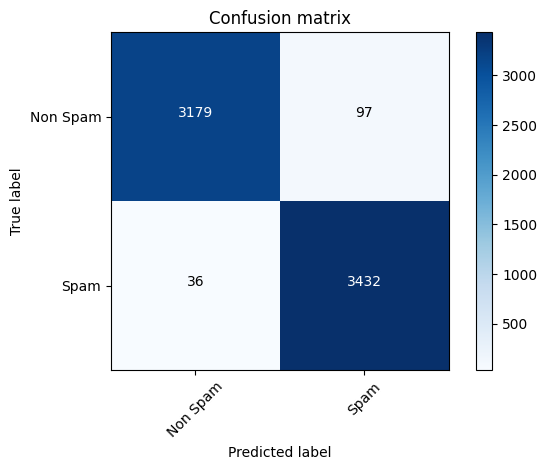

In [127]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')

## SVM

In [128]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score


# Initialize the SVM classifier
svm_clf = LinearSVC()

# Fit the SVM model using the sparse matrix directly
svm_clf.fit(x_train_features, y_train)

# Predict using the SVM classifier
y_predict = svm_clf.predict(x_test_features)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predict)
tn, fp, fn, tp = cm.ravel()


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [129]:
# Calculate performance metrics
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

# Print performance metrics
print("Precision: {:.2f}%".format(100 * precision))
print("Recall: {:.2f}%".format(100 * recall))
print("F1 Score: {:.2f}%".format(100 * f1))
print("Accuracy: {:.2f}%".format(100 * accuracy))

Precision: 97.22%
Recall: 97.87%
F1 Score: 97.54%
Accuracy: 97.46%


In [130]:
cnf_matrix = confusion_matrix(y_test,y_predict)

Confusion matrix, without normalization
[[3179   97]
 [  74 3394]]


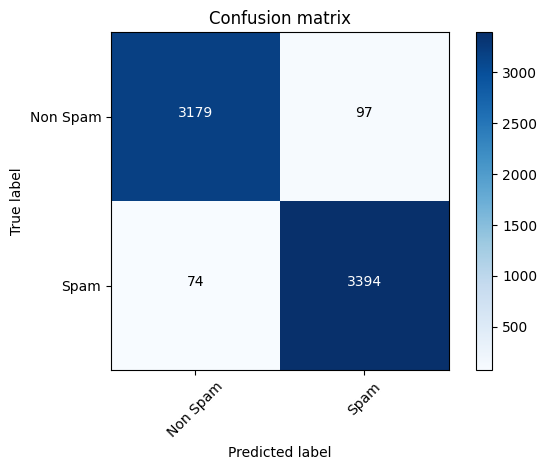

In [131]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')